Importing required Packages

In [2]:
import pandas  as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

#any warning messages that would normally be displayed during the execution of the program will be suppressed, and they won't appear in the output.
import warnings
warnings.filterwarnings("ignore")

# Load Datasets

In [3]:
#load data into Pandas DataFrames 
train=pd.read_csv(r'C:\Users\AA\DataScience\datasets\loandatasets\train_loan.csv')
test=pd.read_csv(r'C:\Users\AA\DataScience\datasets\loandatasets\test_loan.csv')

In [4]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
test.tail()

Loan_ID Gender Married Dependents     Education Self_Employed  \
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Semiurban  
365             1.0         Rural  
366             1.0         Rural

In [6]:
#making copy so it serve as backups or references to the initial state of the datasets before any modifications are made
train_copy=train.copy()
test_copy=test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
#display the data types of each column 
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#check the number of rows and columns of train and test datasets
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
#count the occurrences of unique values
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The counts indicate that there are 422 occurrences of Yes and 192 occurrences of No.

Text(0.5, 1.0, 'Distribution of Loan Status')

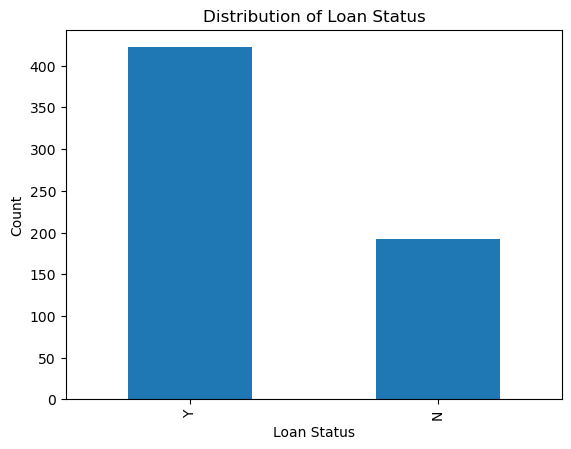

In [13]:
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

In [14]:
#the relative frequencies or proportions of each unique value
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

The proportions indicate that approximately 68.7% of the 'Loan_Status' values are 'Y' (Yes), and 31.3% are 'N' (No).

Text(0.5, 1.0, 'Distribution of Loan Status')

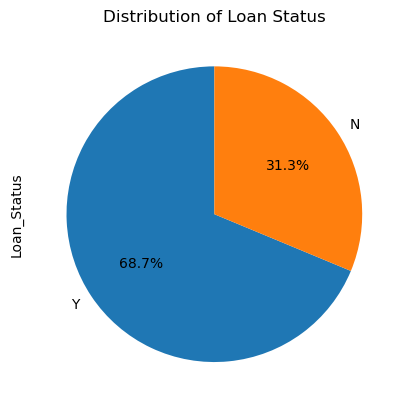

In [15]:
train["Loan_Status"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Loan Status')

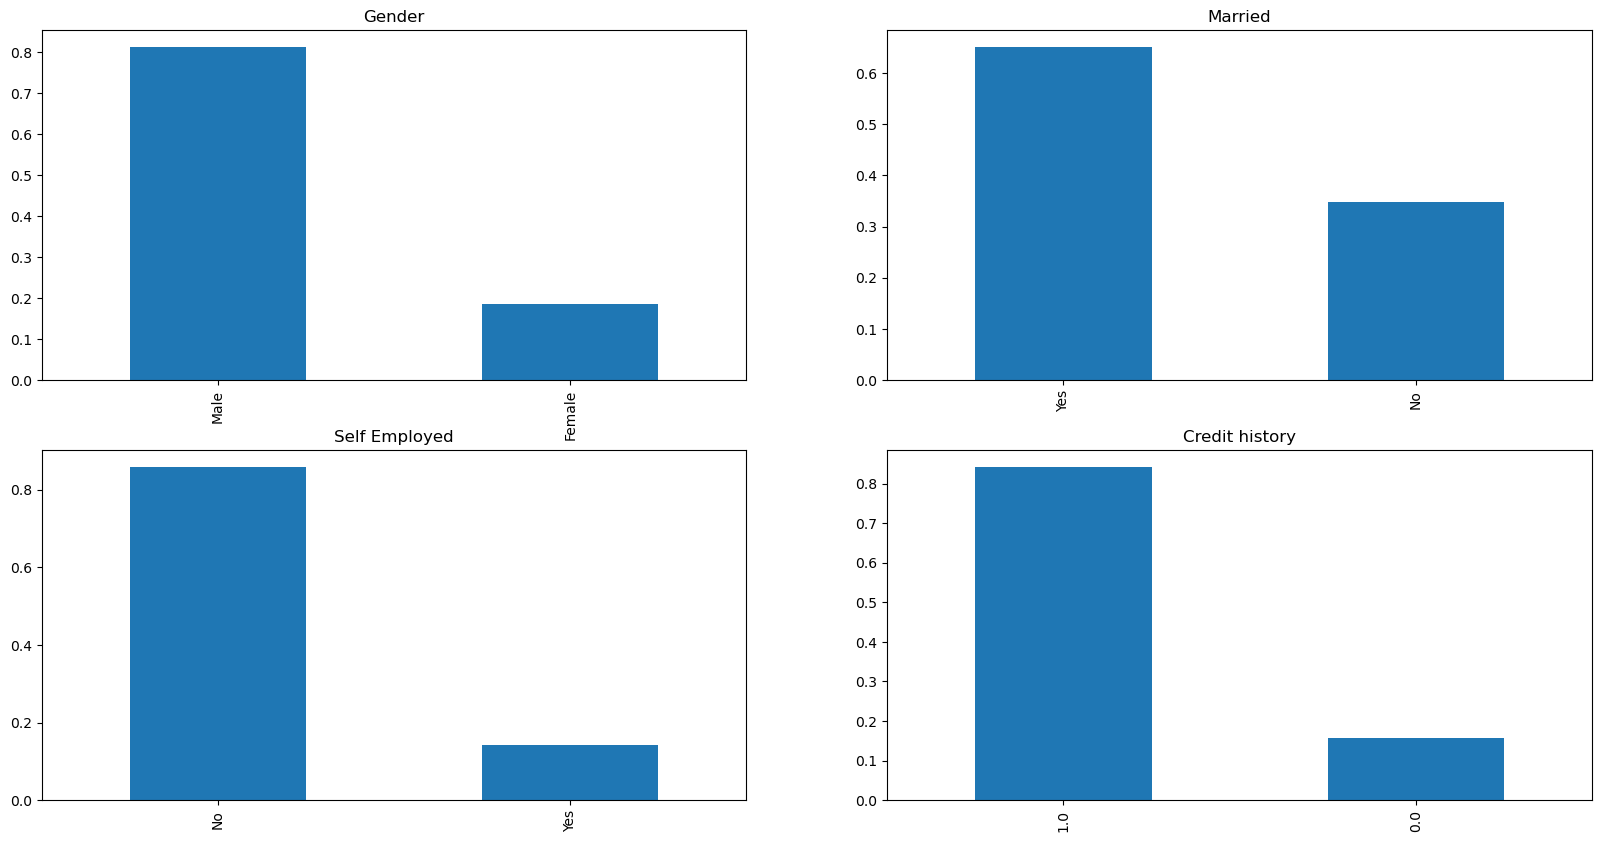

In [16]:
#ploting caegorical features
plt.figure(1),plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit history")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

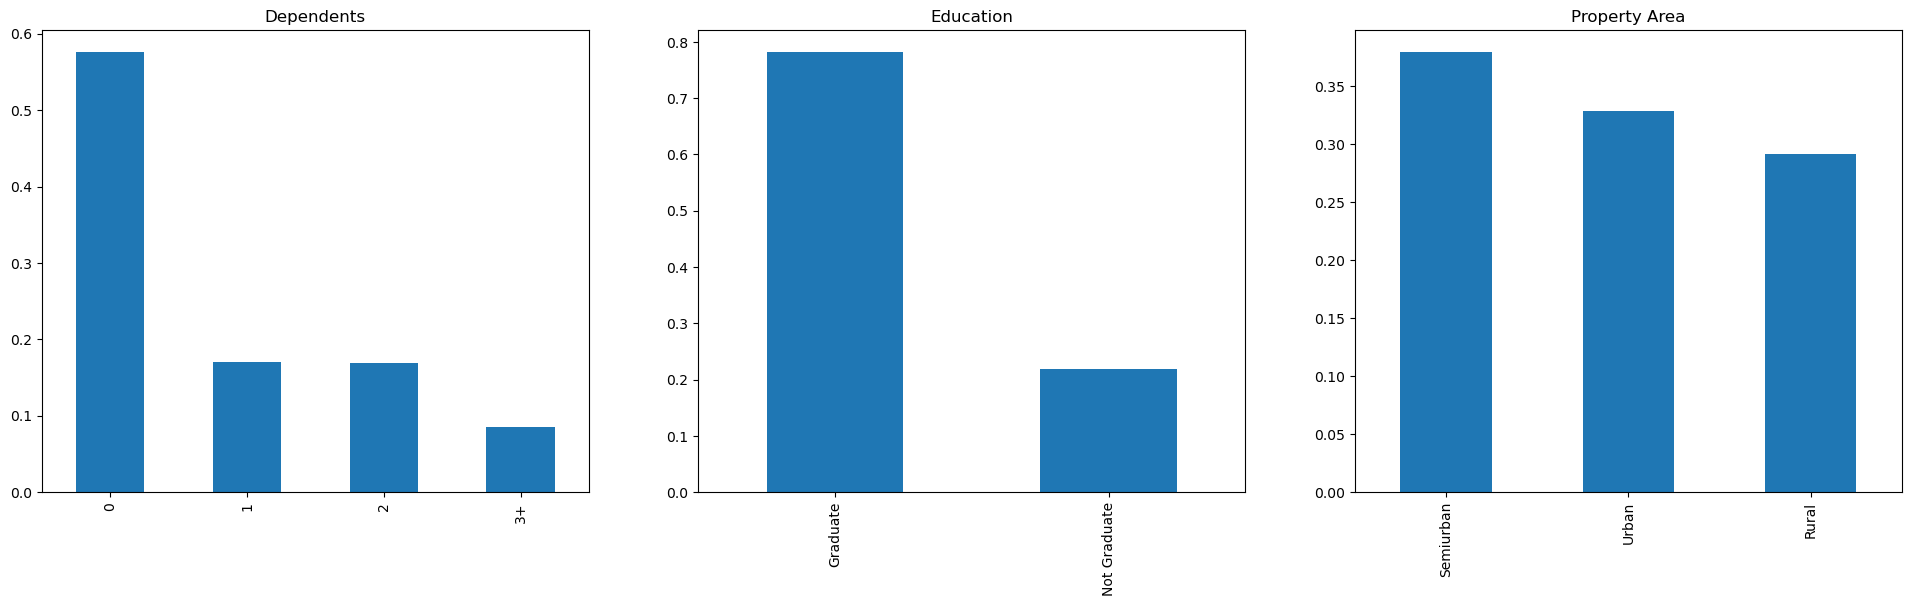

In [17]:
#ploting ordinal features
plt.figure(1),plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title="Property Area")
plt.show

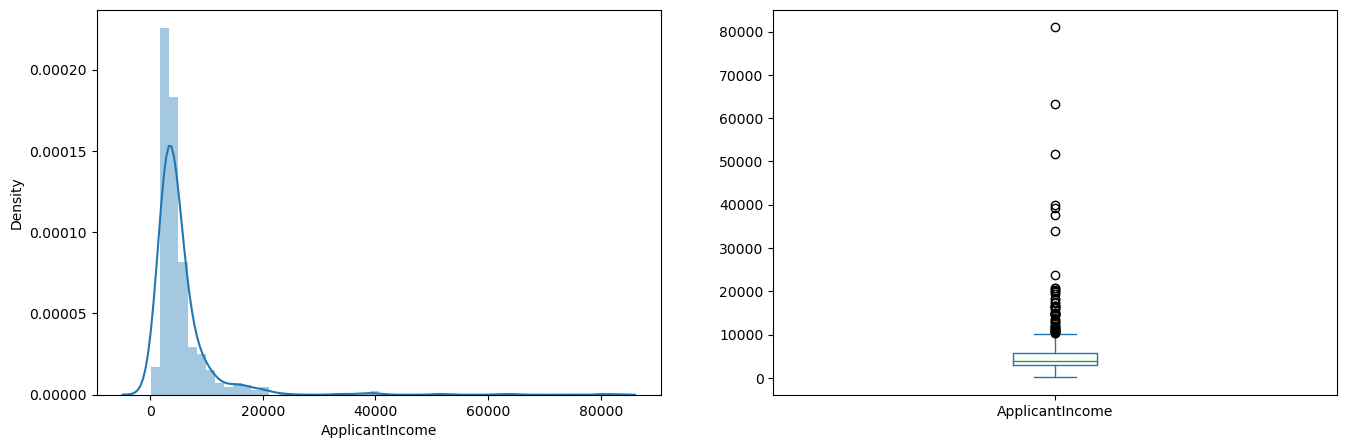

In [18]:
#numerical feature
plt.figure(1),plt.subplot(121)
sns.distplot(train["ApplicantIncome"])
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

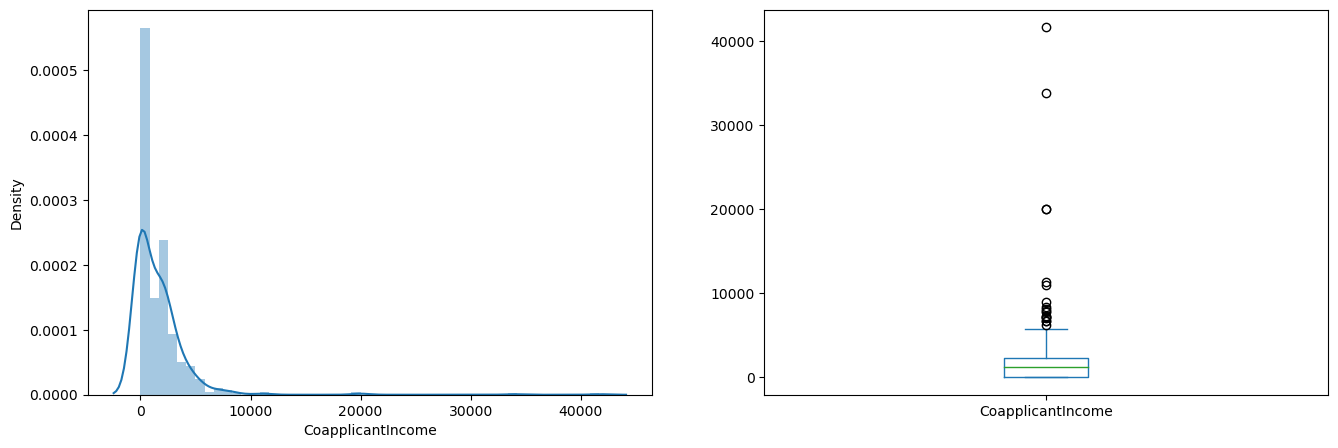

In [19]:
#coapplicant income
plt.figure(1),plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

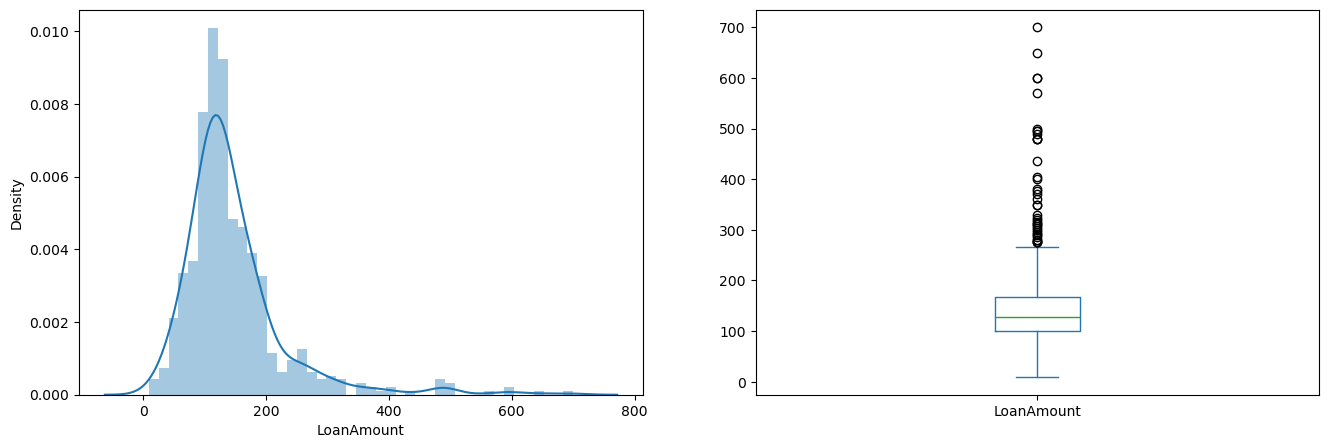

In [20]:
#loan Amount
plt.figure(1),plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

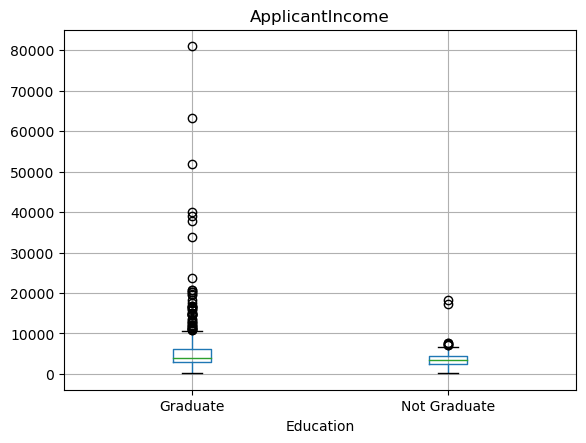

In [21]:
#segageting with education
train.boxplot(column="ApplicantIncome",by="Education")
plt.suptitle("")

Bivariate Analysis

<Axes: xlabel='Property_Area'>

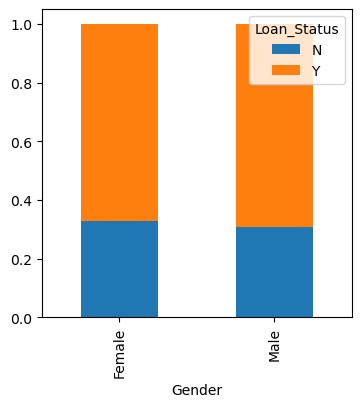

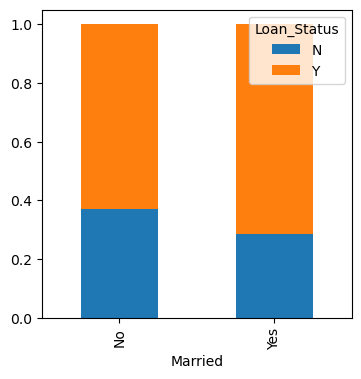

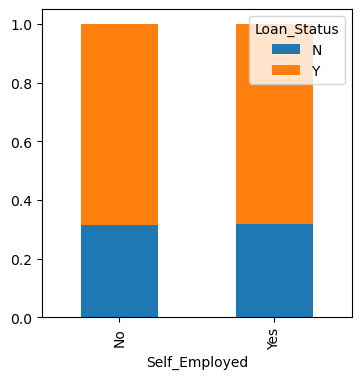

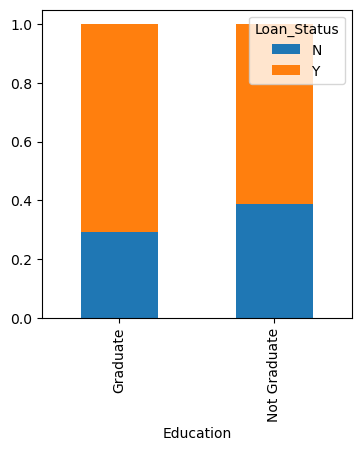

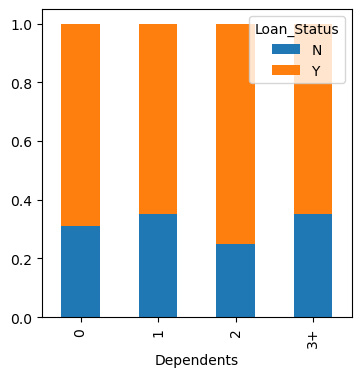

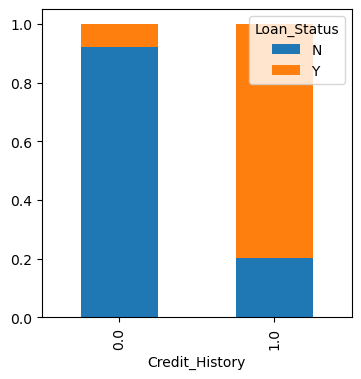

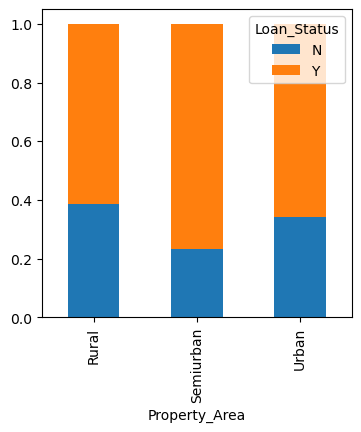

In [22]:
#Categorical vs target variable
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Married = pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Self_employed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Self_employed.div(Self_employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4,))

Education = pd.crosstab(train["Education"], train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Dependents = pd.crosstab(train["Dependents"],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Credit_history =pd.crosstab(train["Credit_History"],train["Loan_Status"])
Credit_history.div(Credit_history.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Property_area = pd.crosstab(train["Property_Area"],train["Loan_Status"])
Property_area.div(Property_area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In [23]:
#numerical vs target
#plotting mean income for loan approval
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<Axes: xlabel='Loan_Status'>

In [24]:
#replacing values
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

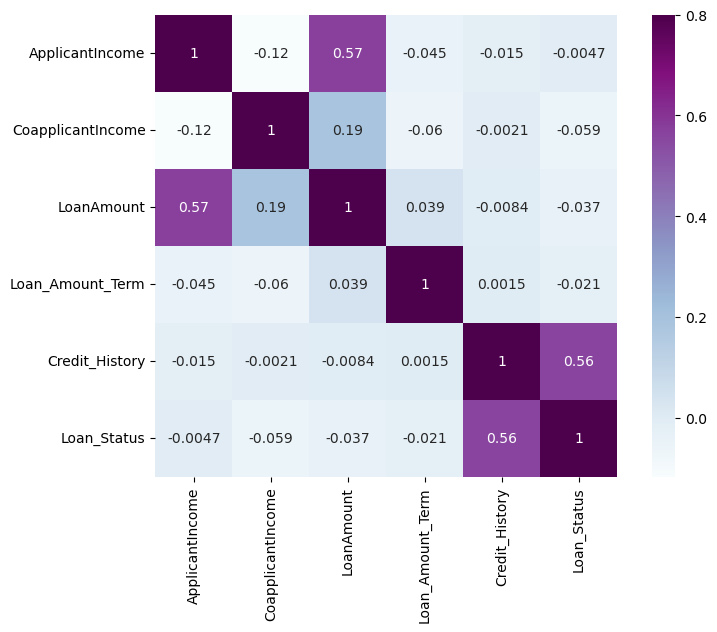

In [25]:
#correltion between numerical values
matrix = train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)
plt.show()

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#imputing categorical values using mode
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [28]:
#checking loan amount values
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
#as 360 is repeating most so using mode
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

In [30]:
#filling Loan amount value which is numerical by median
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [31]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we have handled null value, we carry out similar approach for necessary test data

In [32]:
#filling test data with same approach
test["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
test["Married"].fillna(train["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [33]:
#Outlier treatment: we have right skewness in distribution of loan amounts..so we use log transformtion for this.
train['LoanAmount_log_transform']=np.log(train["LoanAmount"])
train['LoanAmount_log_transform'].hist(bins=20)

<Axes: >

In [34]:
#log transformation on test data
test['LoanAmount_log_transform']=np.log(test['LoanAmount'])

In [35]:
#drop the irrelevant colm
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [36]:
#features and target
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [37]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [38]:
#splitting the dataa in training and validation set
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [39]:
#trainig model using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
model = LogisticRegression()
model.fit(X_train,y_train)
LogisticRegression(C=1,class_weight=None,dual=False,
                  fit_intercept=True,intercept_scaling=1,max_iter=100,
                  multi_class='over',n_jobs=1,penalty='12',
                  random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(C=1, multi_class='over', n_jobs=1, penalty='12',
                   random_state=1, solver='liblinear')

In [41]:
#predicting with validation set and accuracy score
pred_cv = model.predict(X_cv)
accuracy_score(y_cv,pred_cv)

0.7675675675675676

In [42]:
pred_test=model.predict(test)

In [43]:
#Logistic regression using stratified k fold validation
from sklearn.model_selection import StratifiedKFold
i=1
kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kfold.split(X,y):
    print('\n {} of kfold {}'.format(i,kfold.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.8048780487804879

 2 of kfold 5
Accuracy score 0.8373983739837398

 3 of kfold 5
Accuracy score 0.7804878048780488

 4 of kfold 5
Accuracy score 0.7886178861788617

 5 of kfold 5
Accuracy score 0.7950819672131147


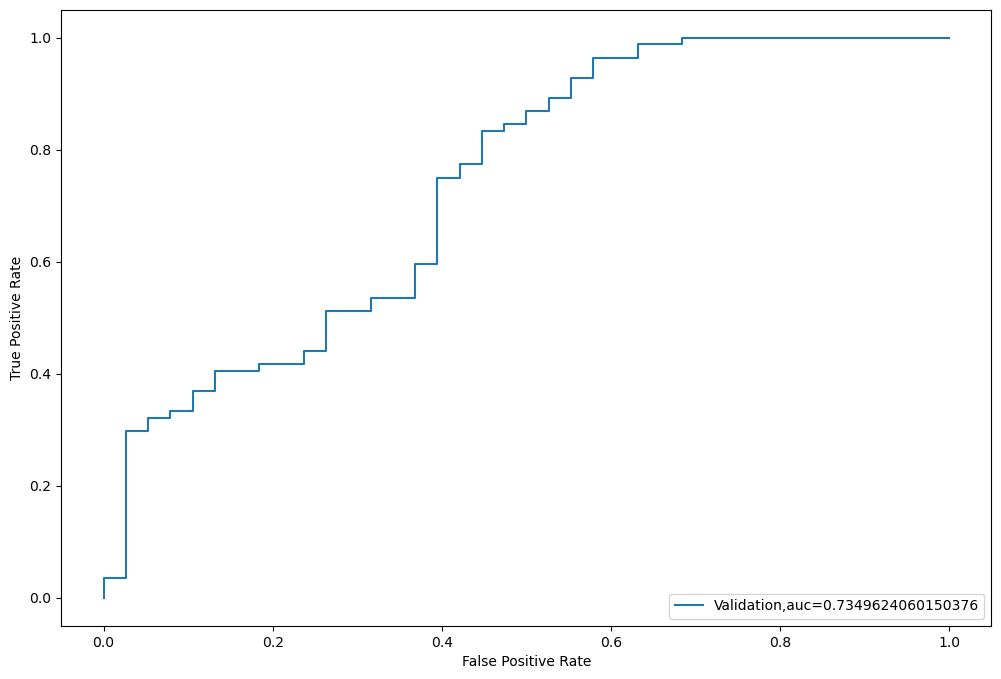

In [46]:
#ROC curve
from sklearn import metrics
false_positive_rate,true_positive_rate,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(false_positive_rate,true_positive_rate,label="Validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [47]:
#feature engineering with new variables Total Income, EMI, Balance Incomne
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])

<Axes: xlabel='Total_Income', ylabel='Density'>

In [48]:
#dist plot is right skewed so taking log transformation
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

<Axes: xlabel='EMI', ylabel='Density'>

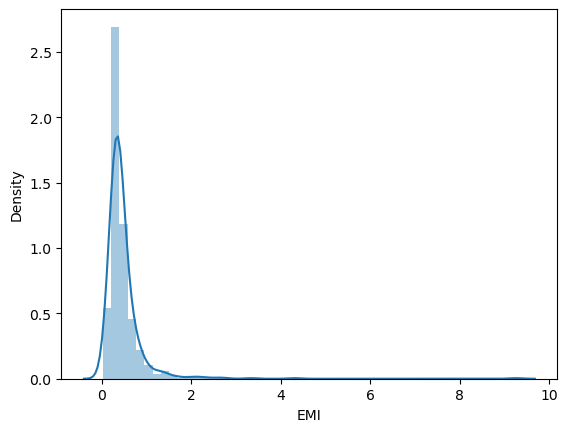

In [49]:
#EMI
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/train['Loan_Amount_Term']
sns.distplot(train['EMI'])

<Axes: xlabel='Balance_Income', ylabel='Density'>

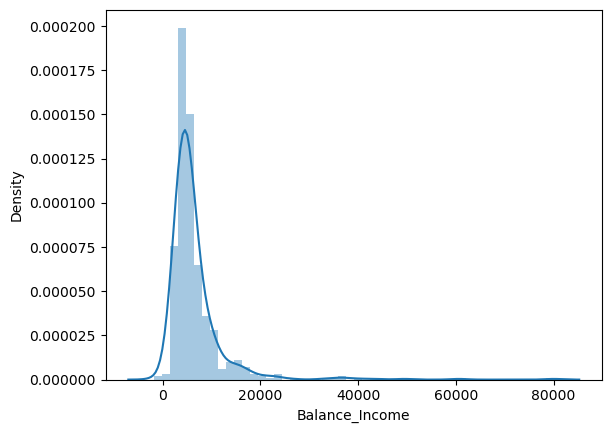

In [50]:
#balance income
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(train['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [51]:
#dropping old features to avoid high corr with new features and reduce noise
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [52]:
#Model Building II
#Using Logistic Regression in new features data
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [53]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.iloc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.7886178861788617

 2 of kfold 5
Accuracy score 0.6910569105691057

 3 of kfold 5
Accuracy score 0.6666666666666666

 4 of kfold 5
Accuracy score 0.7804878048780488

 5 of kfold 5
Accuracy score 0.680327868852459


In [54]:
#Decison Tree
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.7398373983739838

 2 of kfold 5
Accuracy score 0.6991869918699187

 3 of kfold 5
Accuracy score 0.7560975609756098

 4 of kfold 5
Accuracy score 0.7073170731707317

 5 of kfold 5
Accuracy score 0.6721311475409836


In [55]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.8292682926829268

 2 of kfold 5
Accuracy score 0.8130081300813008

 3 of kfold 5
Accuracy score 0.7723577235772358

 4 of kfold 5
Accuracy score 0.8048780487804879

 5 of kfold 5
Accuracy score 0.7540983606557377


In [56]:
#Now we can imporove score by hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),param_grid)

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

grid_search.fit(x_train,y_train)
GridSearchCV(cv=None,error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True,class_weight=None,
                                              criterion='gini',max_depth=None,max_features='auto',
                                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                              min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
                                              n_estimators=10,n_jobs=1,oob_score=False,random_state=1,verbose=0),
            param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],'n_estimators':[1,21,41,61,81,101,121,141,161,181]},
            pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,verbose=0)

grid_search.best_estimator_
RandomForestClassifier(bootstrap=True,class_weight=None,
                                              criterion='gini',max_depth=3,max_features='auto',
                                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                              min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
                                              n_estimators=41,n_jobs=1,oob_score=False,random_state=1,verbose=0)
#building the model now

i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred2=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.8130081300813008

 2 of kfold 5
Accuracy score 0.8455284552845529

 3 of kfold 5
Accuracy score 0.8048780487804879

 4 of kfold 5
Accuracy score 0.7967479674796748

 5 of kfold 5
Accuracy score 0.7786885245901639


In [ ]:
#finding feature importance 
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

<Axes: >

In [58]:
#XGBoost
from xgboost import XGBClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=XGBClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred3=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.7723577235772358

 2 of kfold 5
Accuracy score 0.7886178861788617

 3 of kfold 5
Accuracy score 0.7723577235772358

 4 of kfold 5
Accuracy score 0.7804878048780488

 5 of kfold 5
Accuracy score 0.7704918032786885
